In [3]:
import numpy as np
import pandas as pd
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.font_manager as fm
import seaborn as sns
import warnings

fontpath = 'C:/Users/TaeSoo/AppData/Local/Microsoft/Windows/Fonts/NanumGothic.ttf'
%matplotlib inline
warnings.filterwarnings(action='ignore')

plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['xtick.labelsize'] = 6
pd.options.display.float_format = '{:.5f}'.format

In [4]:
review_df = pd.read_csv('google_review_pre.csv', index_col = 0)

In [5]:
review_df['date'] = pd.to_datetime(review_df['date'])

review_df['year'] = review_df['date'].dt.year
review_df['month'] = review_df['date'].dt.month
review_df['year_month'] = review_df['date'].dt.to_period(freq = 'M') 

In [6]:
pos_review_df = review_df[review_df['review_score'] > 3]
neg_review_df = review_df[review_df['review_score'] <= 3]

### ppt 원 그래프

In [7]:
grouped_review = pd.DataFrame(review_df.groupby(review_df['review_score'])[['id']].count())
grouped_review.reset_index(drop = False, inplace = True)

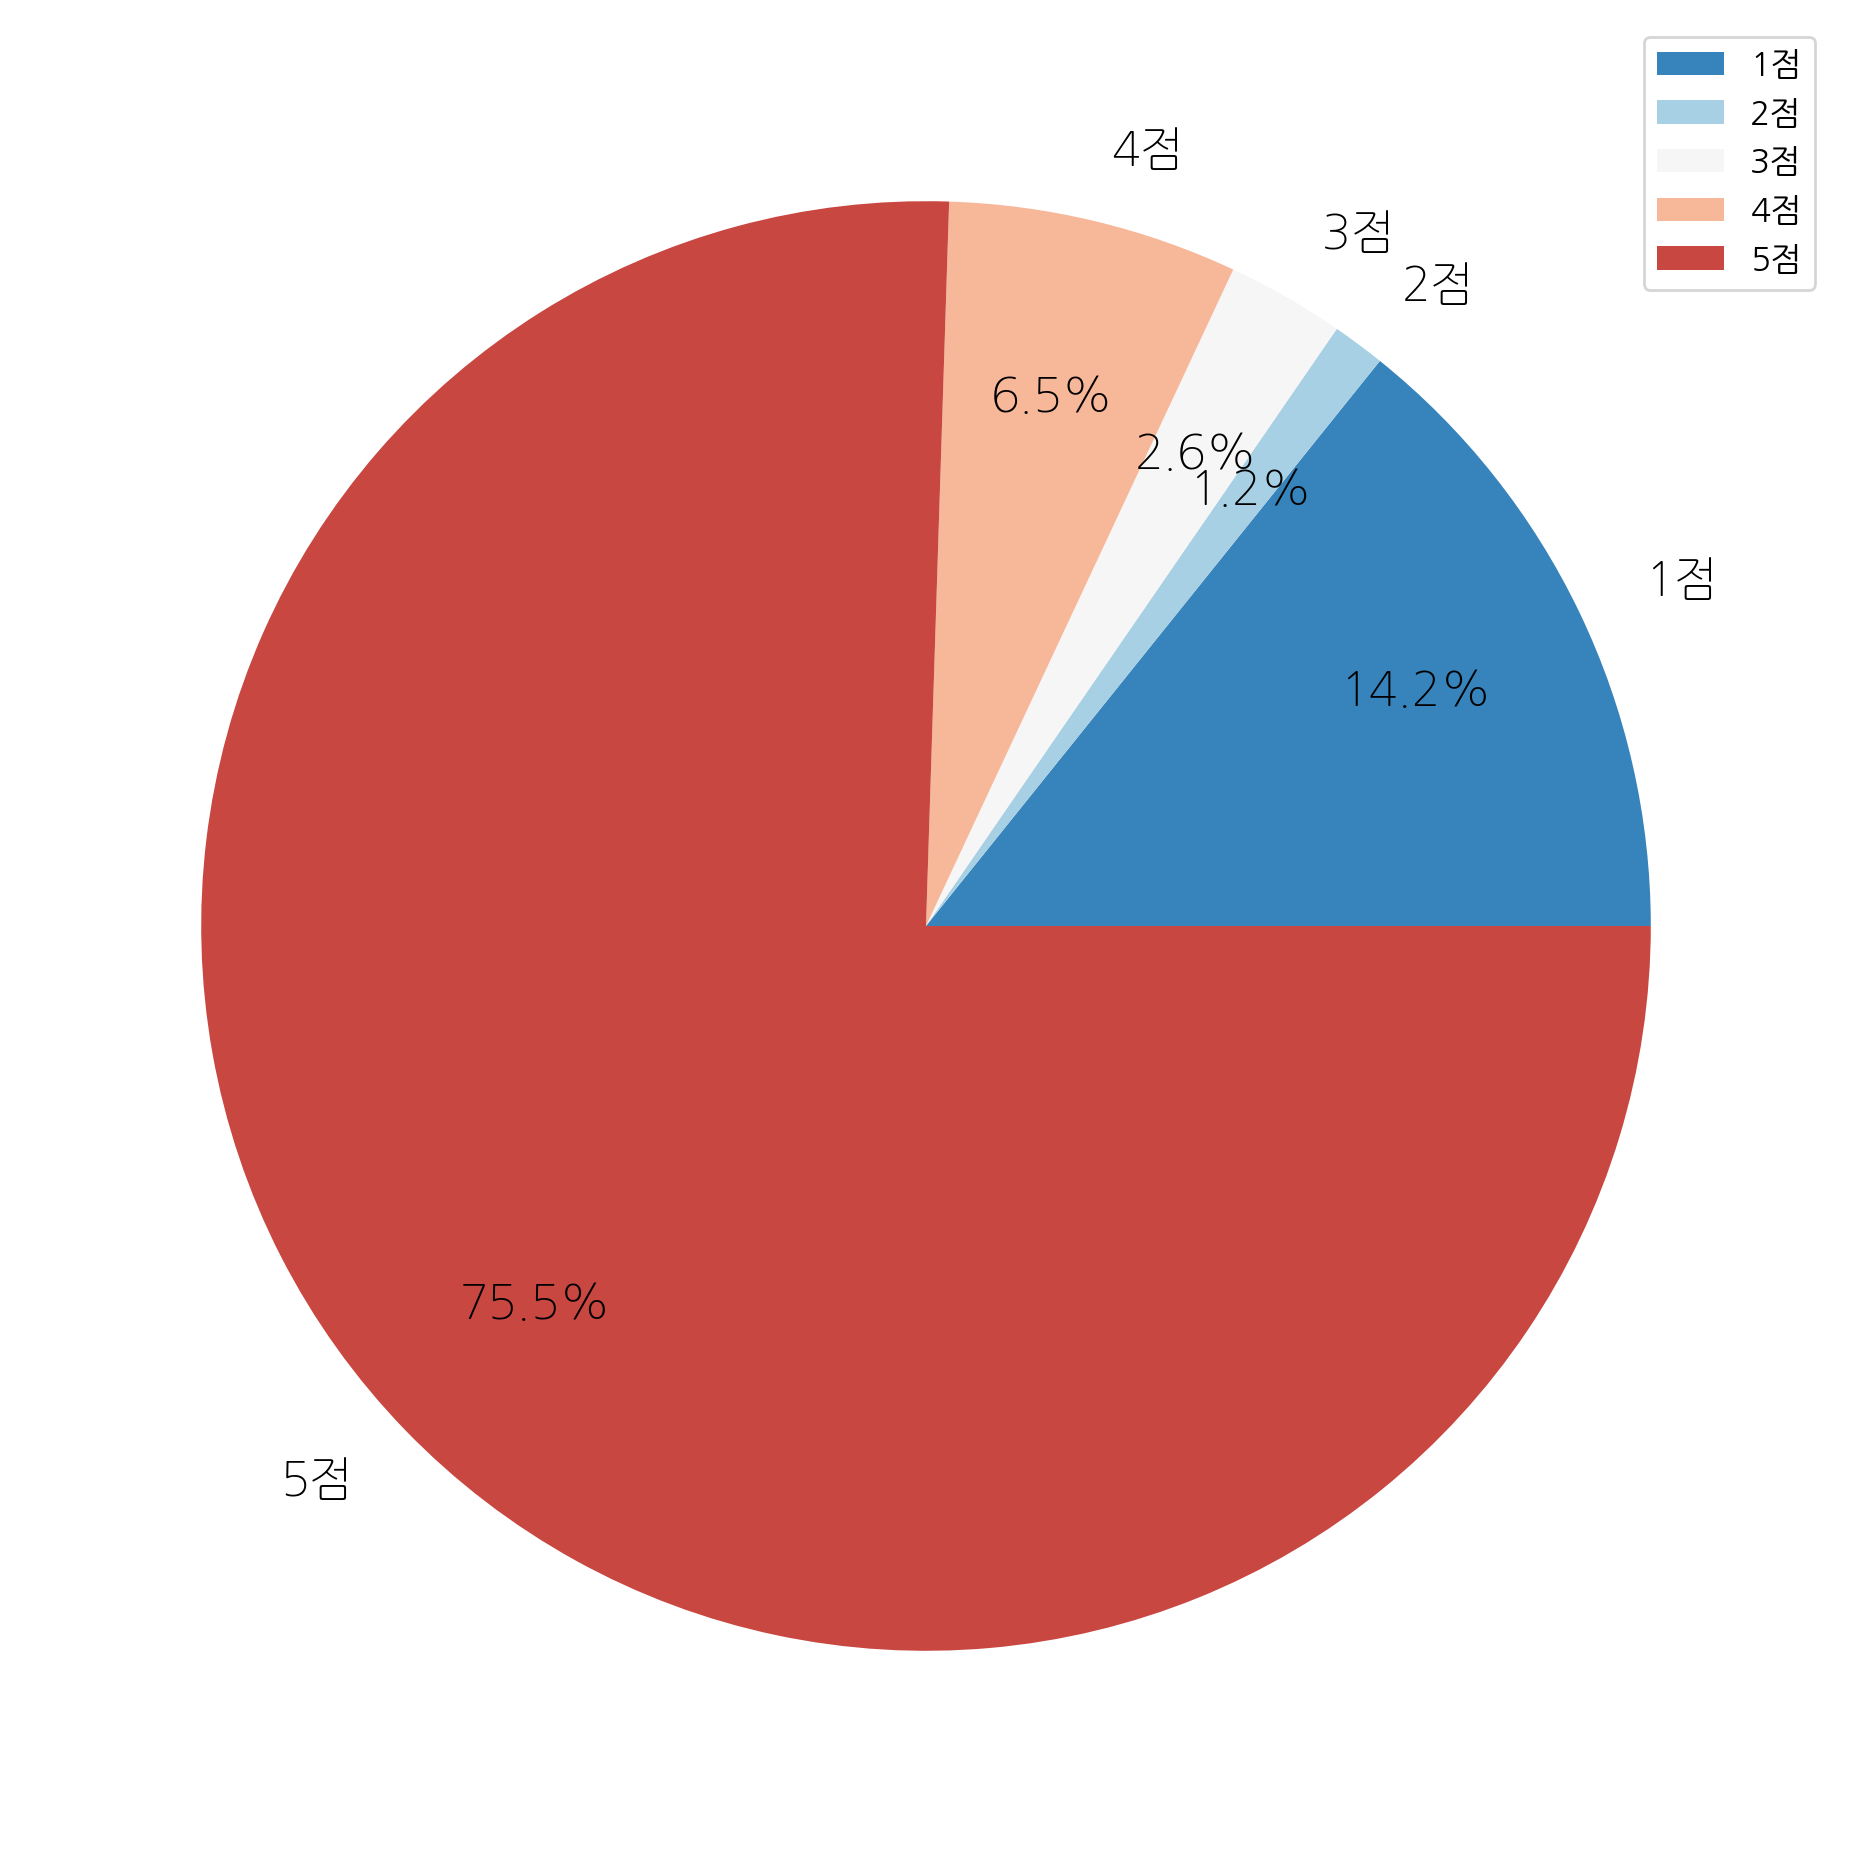

In [21]:
fig, ax = plt.subplots(1,1, figsize=(15, 12))

labels = ['1점', '2점', '3점', '4점', '5점']
textprops = dict(size=17, weight=40)

ax.pie(grouped_review['id'], labels = labels, textprops = textprops,
        startangle=0, autopct = '%.1f%%', pctdistance = 0.75,
        colors=sns.color_palette(sns.color_palette("RdBu_r", 5))
       )
# ax.axis('equal') 

ax.legend(fontsize = 12)

plt.show()

In [9]:
review_mean_df = review_df.groupby(review_df['year']).mean()
review_size_df = review_df.groupby(review_df['year']).size()

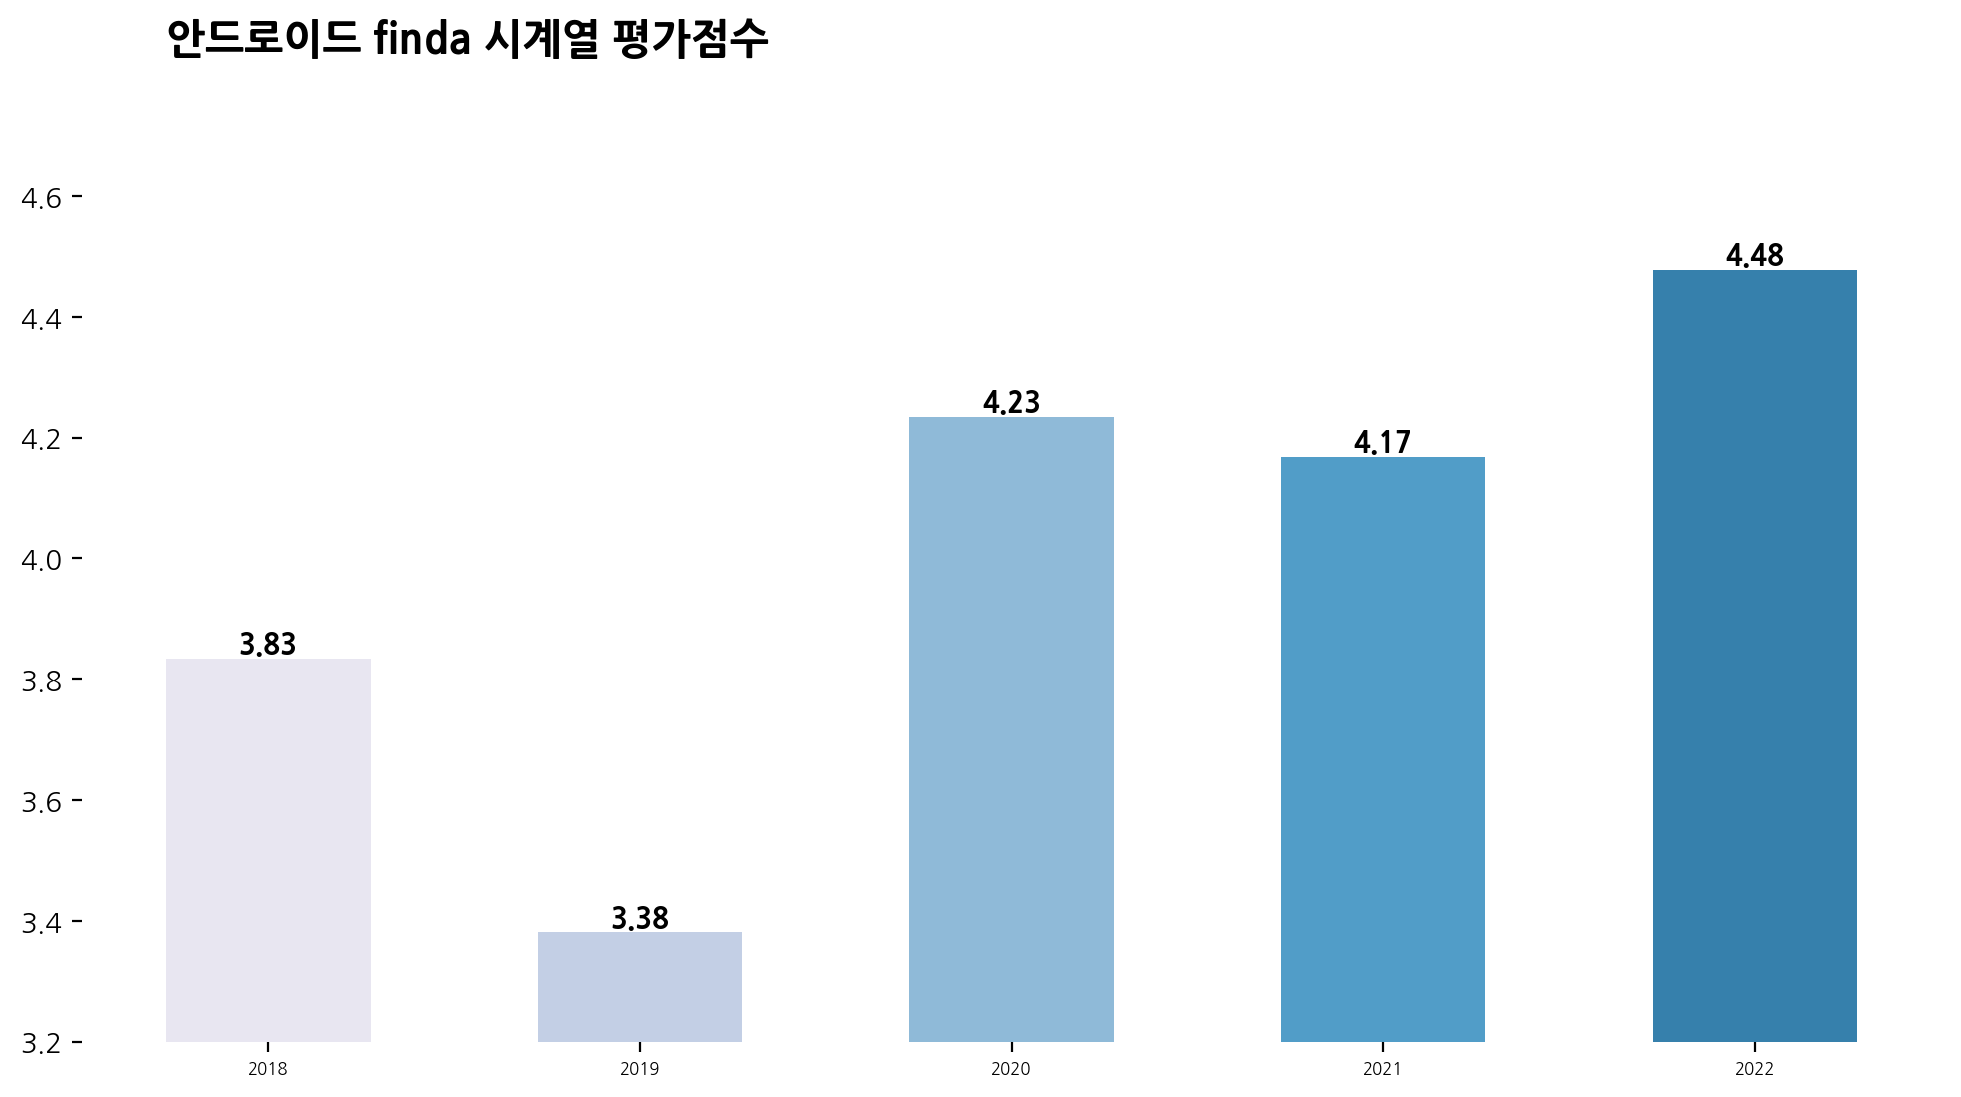

In [24]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))

k = ax.bar(review_mean_df.index, review_mean_df['review_score'], width=0.55, color = sns.color_palette("PuBu",5), alpha=0.8)
ax.bar_label(k, color = 'black', fontweight = 'bold', fmt='%.2f')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
fig.text(0.16, 0.95, '안드로이드 finda 시계열 평가점수', fontsize=15, fontweight='bold')   
plt.ylim([3.2,4.7])  
plt.show()

### ppt2-2 긍정-부정 리뷰

In [6]:
def cnt_visual_pre(df) :
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['year_month'] = df['date'].dt.to_period(freq = 'M') 

    df = pd.DataFrame(df.groupby(df['year_month'])[['review_score']].agg(['count']))
    df.reset_index(drop = False, inplace = True)
    df.columns = df.columns.droplevel(0)
    df.columns = ['year_month', 'score_cnt']

    df = df.set_index('year_month')
    df.index = df.index.to_timestamp()
    return df

In [7]:
pos_review_cnt_df = cnt_visual_pre(pos_review_df)
neg_review_cnt_df = cnt_visual_pre(neg_review_df)

In [8]:
score_cnt_df = pd.concat([pos_review_cnt_df, neg_review_cnt_df], axis = 1)
score_cnt_df.columns = ['pos_cnt', 'neg_cnt']
score_cnt_df = score_cnt_df.fillna(0)
score_cnt_df['pos_neg'] = score_cnt_df['pos_cnt'] - score_cnt_df['neg_cnt']

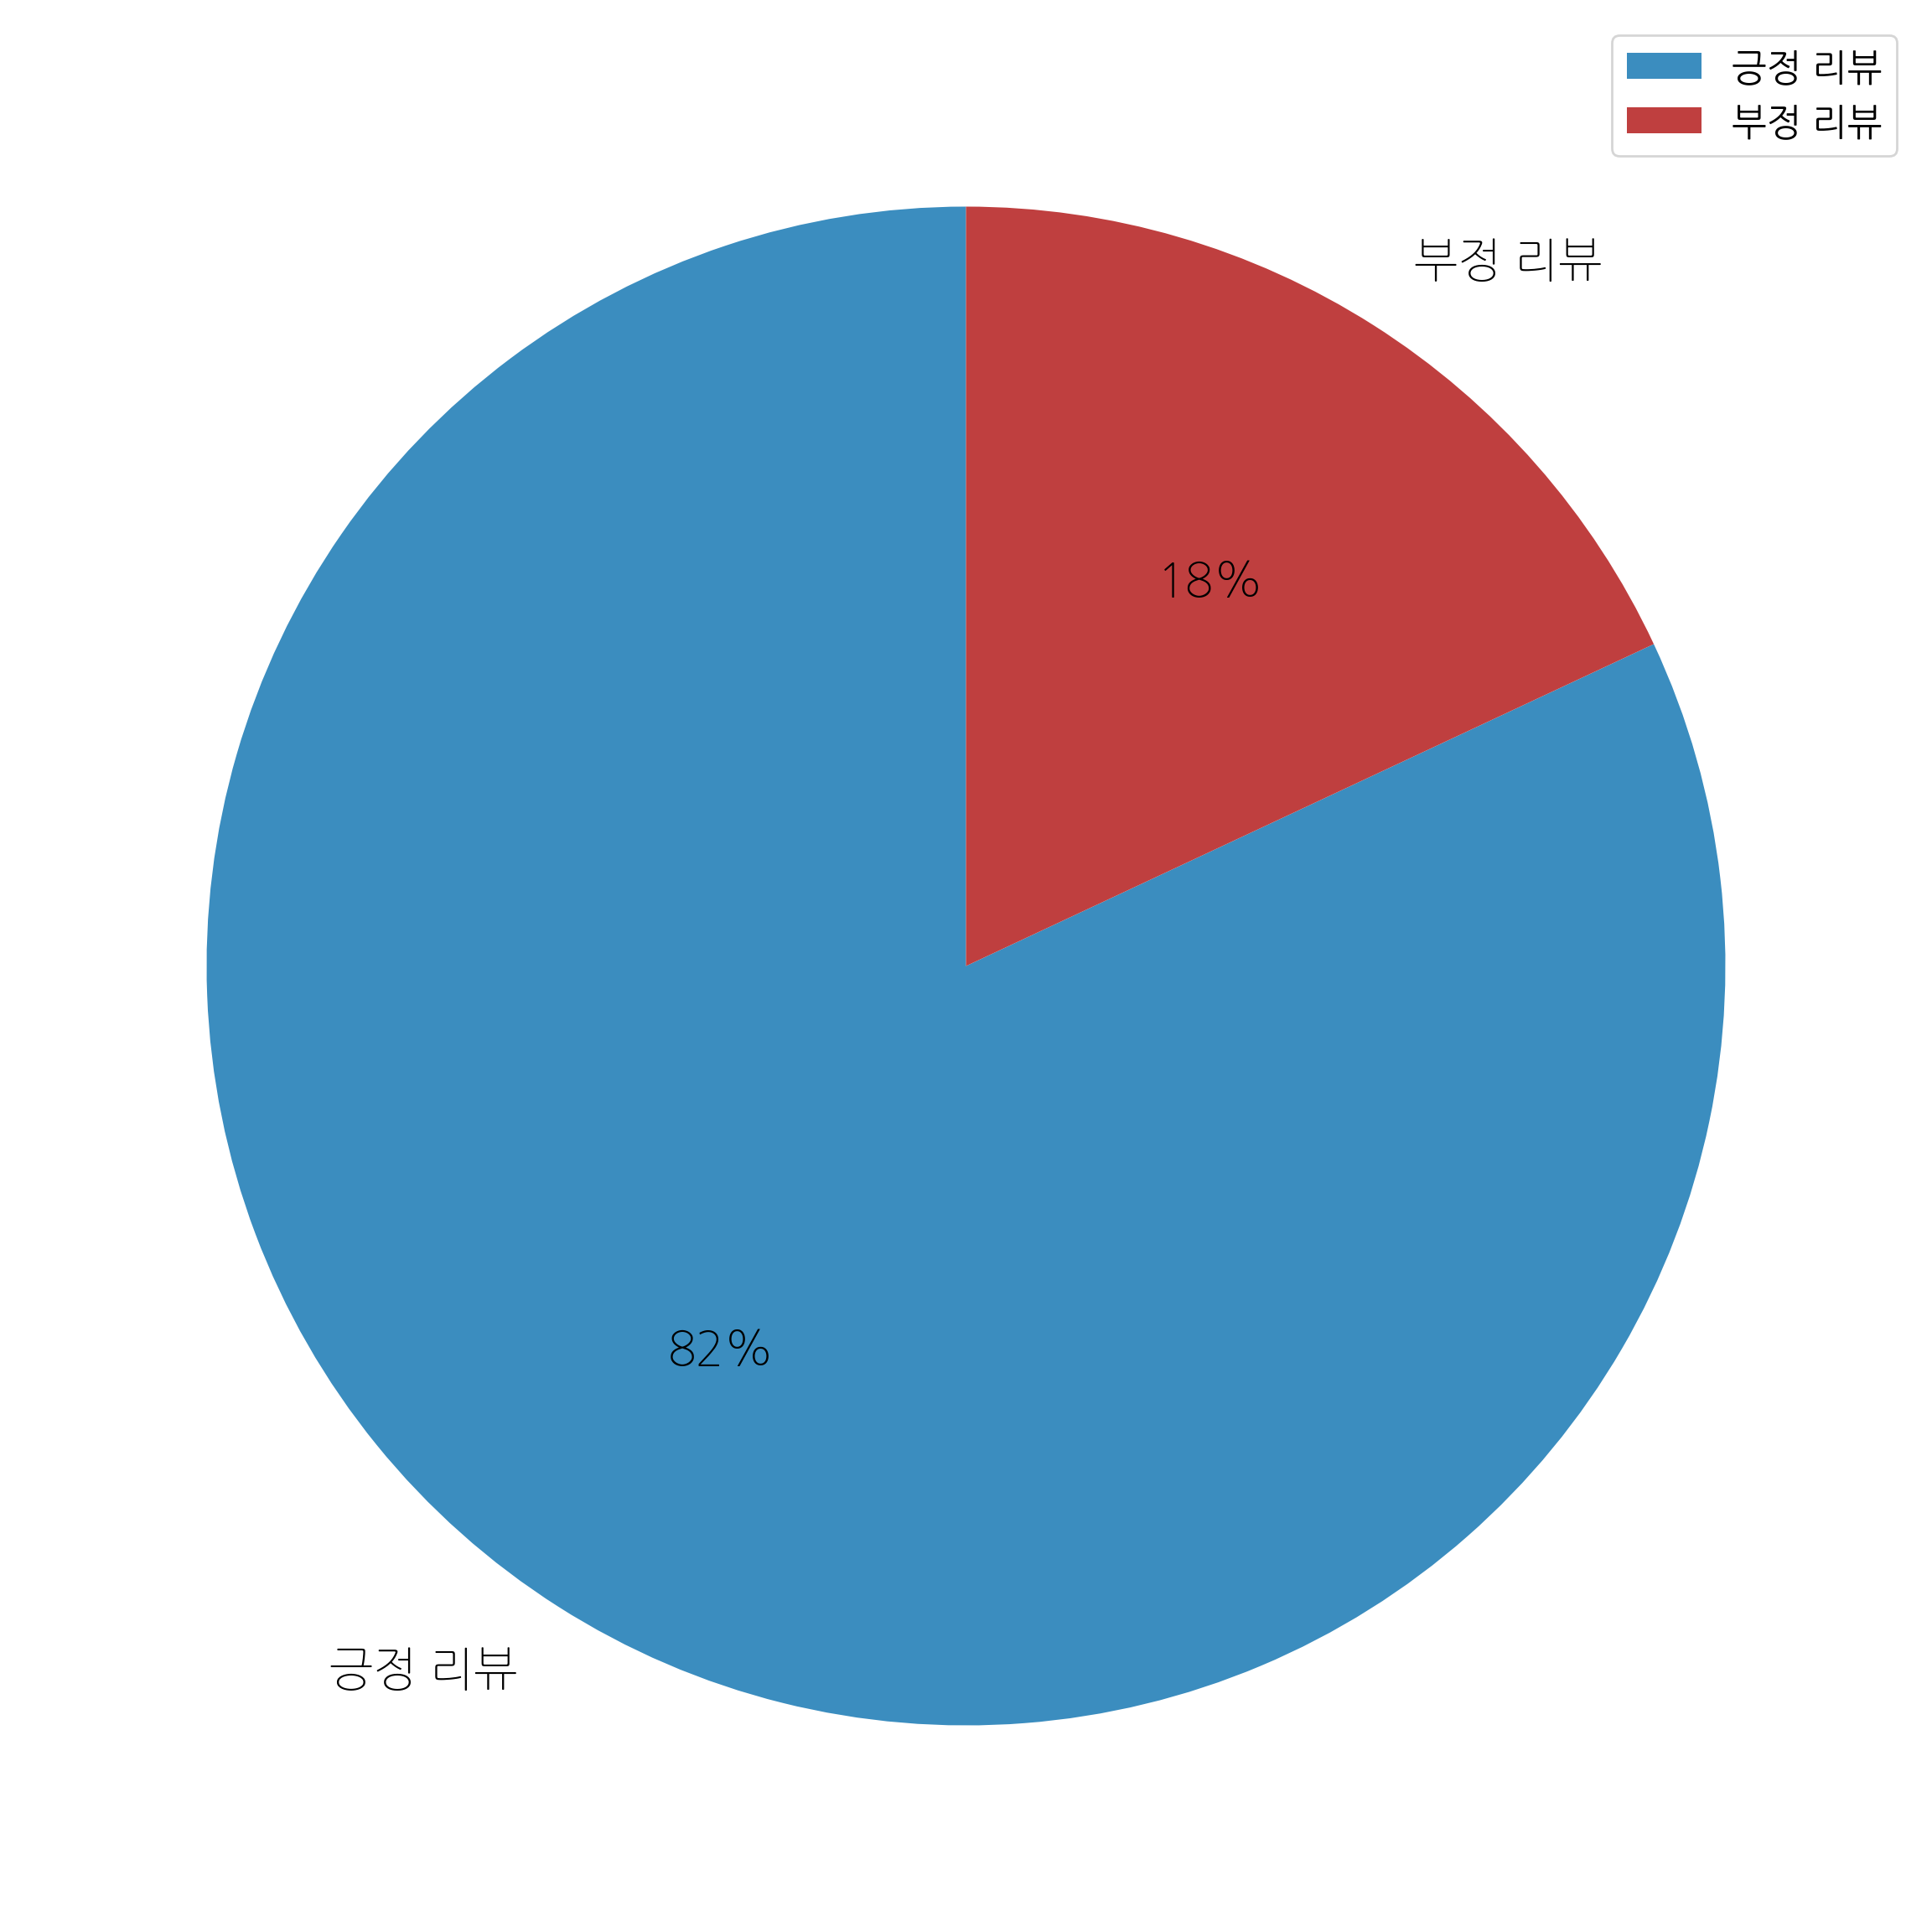

In [138]:
fig, ax = plt.subplots(1,1, figsize=(28, 15))

data = [score_cnt_df['pos_cnt'].sum(), score_cnt_df['neg_cnt'].sum()]
textprops = dict(size=20, weight=25)

ax.pie(data, labels = ['긍정 리뷰', '부정 리뷰'], textprops = textprops,
        startangle=90, autopct = '%.0f%%', pctdistance = 0.6,
        colors= ['#3B8DBF', '#BF3F3F']
       )
# ax.axis('equal') 

ax.legend(fontsize = 16)

plt.show()

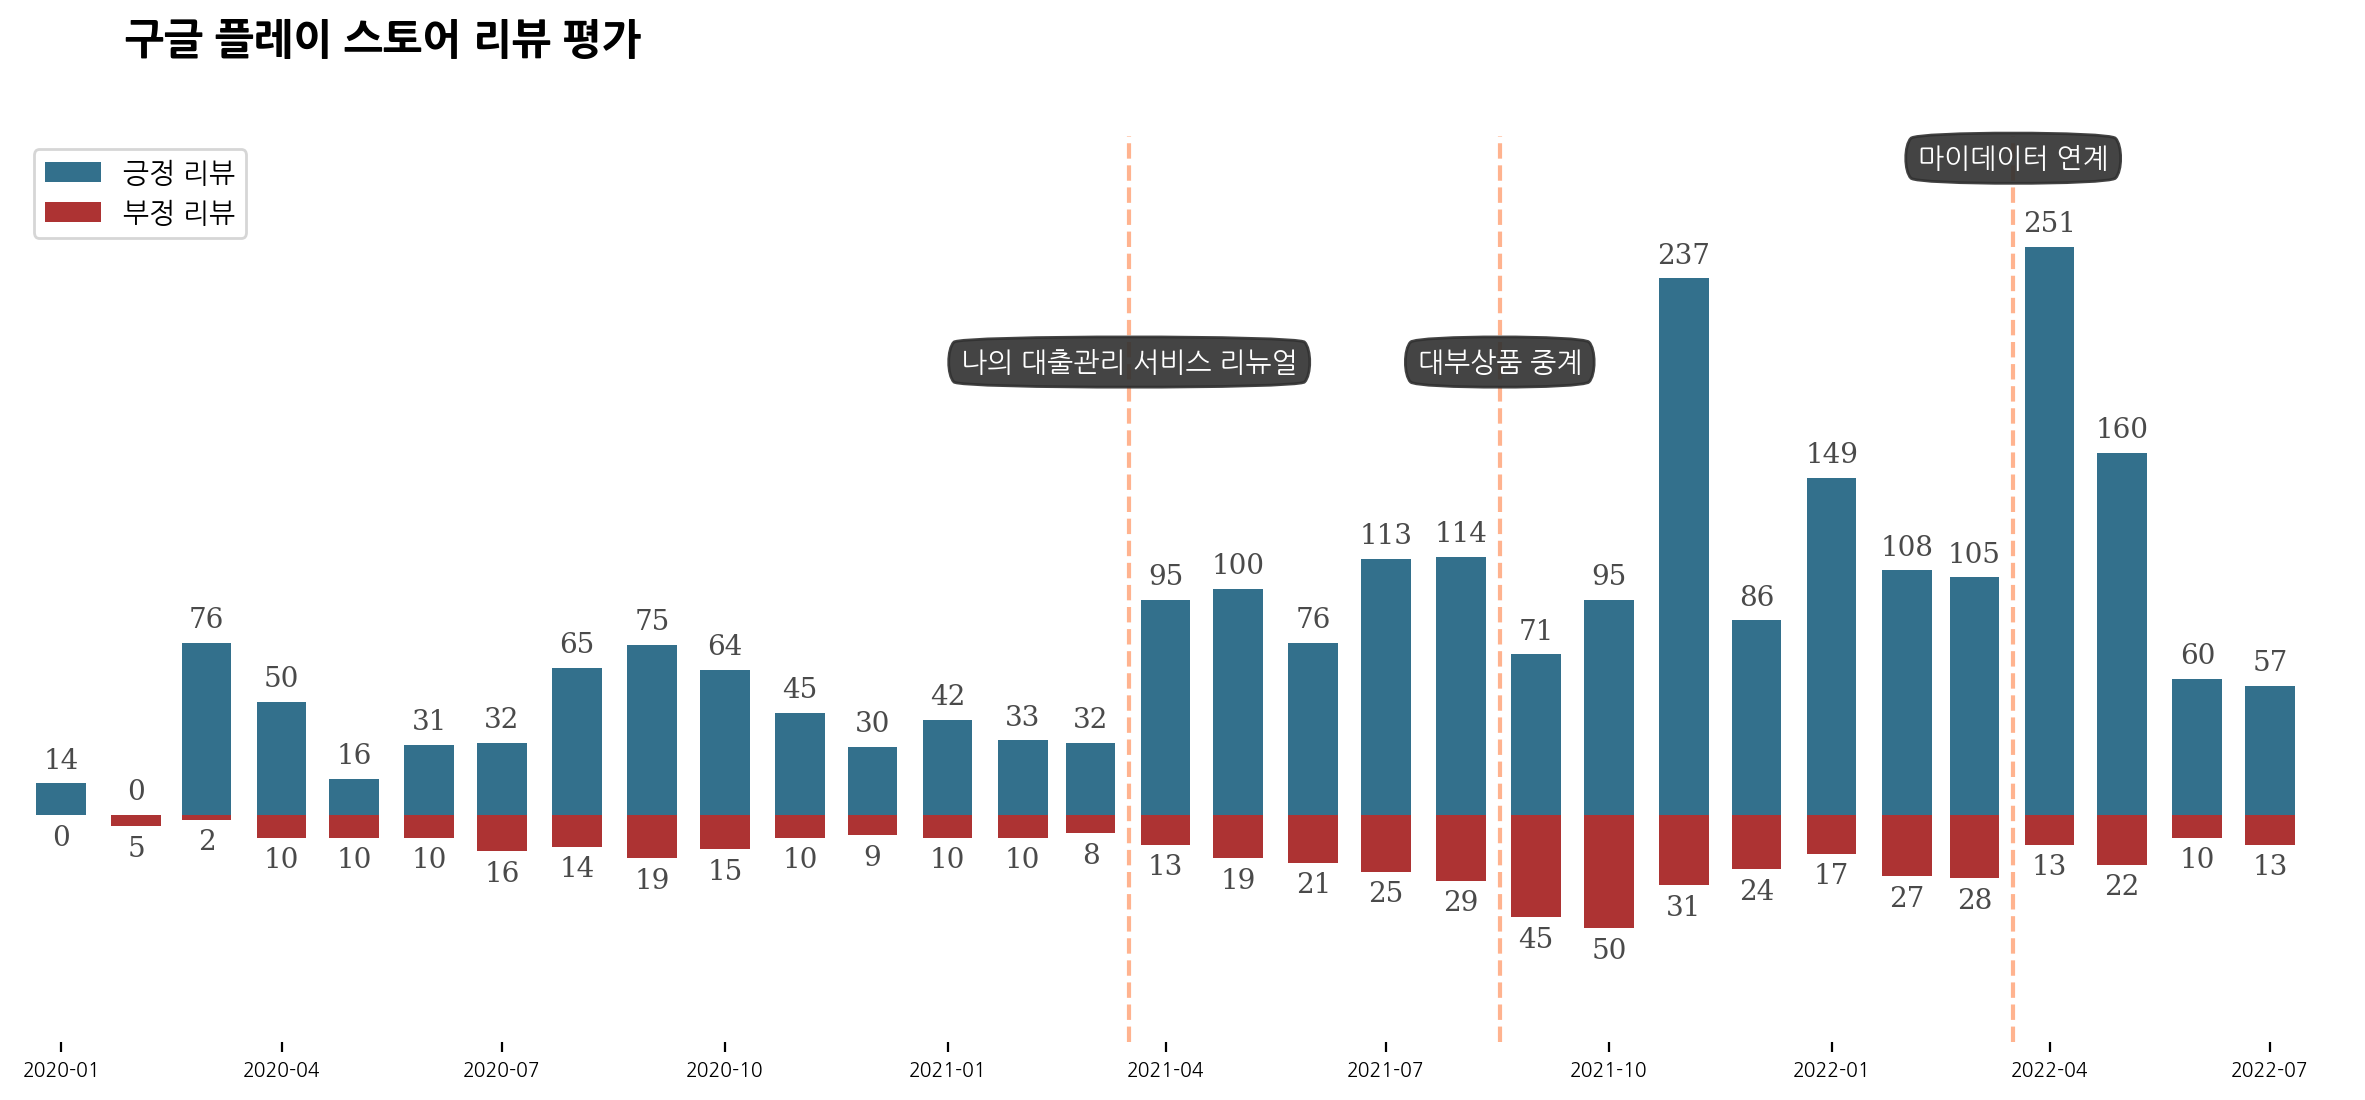

In [79]:
fig, ax = plt.subplots(1,1, figsize=(15, 6))
ax.bar(score_cnt_df.index, score_cnt_df['pos_cnt'], width=20.55, color='#004c70', alpha=0.8, label='긍정 리뷰')
ax.bar(score_cnt_df.index, -score_cnt_df['neg_cnt'], width=20.55, color='#990000', alpha=0.8, label='부정 리뷰')
ax.set_ylim(-100, 300)

for i in score_cnt_df.index:
    ax.annotate(f"{int(score_cnt_df.loc[i, 'pos_cnt'])}", 
                   xy=(i, score_cnt_df.loc[i, 'pos_cnt'] + 10),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
for i in score_cnt_df.index:
    ax.annotate(f"{int(score_cnt_df.loc[i, 'neg_cnt'])}", 
                   xy=(i, -score_cnt_df.loc[i, 'neg_cnt'] - 10),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')    

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

plt.axvline(x= pd.to_datetime("2021-03-17"), linestyle='--', color='#ffb38f')
plt.axvline(x= pd.to_datetime("2021-08-17"), linestyle='--', color='#ffb38f')
plt.axvline(x= pd.to_datetime("2022-03-17"), linestyle='--', color='#ffb38f')

issue_date = ["2021-03-17", "2021-08-17", "2022-03-17"]
events = ['나의 대출관리 서비스 리뉴얼', '대부상품 중계', '마이데이터 연계']
up_down = [200, 200, 290]

for issue_i, event, ud_i in zip(issue_date, events, up_down) :
    ax.annotate(event,
                xy=(pd.to_datetime(issue_i), ud_i), # x y 좌표
                xytext=(0,0), textcoords='offset points',
                va="center", ha="center",
                color="w", fontsize=10,
                bbox=dict(boxstyle='round4', pad=0.5, color='#303030', alpha=0.90))

ax.set_yticks([])    
ax.legend(loc = 'upper left')
fig.text(0.16, 0.95, '구글 플레이 스토어 리뷰 평가', fontsize=15, fontweight='bold') 
plt.xlim([pd.to_datetime("2019-12-15"), pd.to_datetime("2022-08")])   
plt.rcParams['xtick.labelsize'] = 7
plt.show()

### ppt3-1 Top3 postive keyword 시각화

In [10]:
def keyword_visual_pre(pos_df, neg_df, keyword) :
    pos_keyword_df = pos_df[pos_df['content'].str.contains(keyword)]
    neg_keyword_df = neg_df[neg_df['content'].str.contains(keyword)]

    pos_keyword_cnt_df = cnt_visual_pre(pos_keyword_df)
    neg_keyword_cnt_df = cnt_visual_pre(neg_keyword_df)

    df = pd.concat([pos_keyword_cnt_df, neg_keyword_cnt_df], axis = 1)
    df.columns = ['pos_cnt', 'neg_cnt']
    df = df.fillna(0)

    return df

In [11]:
loan_cnt_df = keyword_visual_pre(pos_review_df, neg_review_df, '대출')
interst_cnt_df = keyword_visual_pre(pos_review_df, neg_review_df, '금리')
serch_cnt_df = keyword_visual_pre(pos_review_df, neg_review_df, '조회')

In [12]:
loan_cnt_df['pos_neg'] = loan_cnt_df['pos_cnt'] - loan_cnt_df['neg_cnt']
interst_cnt_df['pos_neg'] = interst_cnt_df['pos_cnt'] - interst_cnt_df['neg_cnt']
serch_cnt_df['pos_neg'] = serch_cnt_df['pos_cnt'] - serch_cnt_df['neg_cnt']

In [13]:
keyword_cnt_df = pd.concat([loan_cnt_df, interst_cnt_df, serch_cnt_df], axis = 1)
keyword_cnt_df.columns = ['pos_loan', 'neg_loan', 'pos_neg_loan', \
                          'pos_interst', 'neg_interst', 'pos_neg_interst', \
                          'pos_serch', 'neg_serch', 'pos_neg_serch']
keyword_cnt_df = keyword_cnt_df.fillna(0)

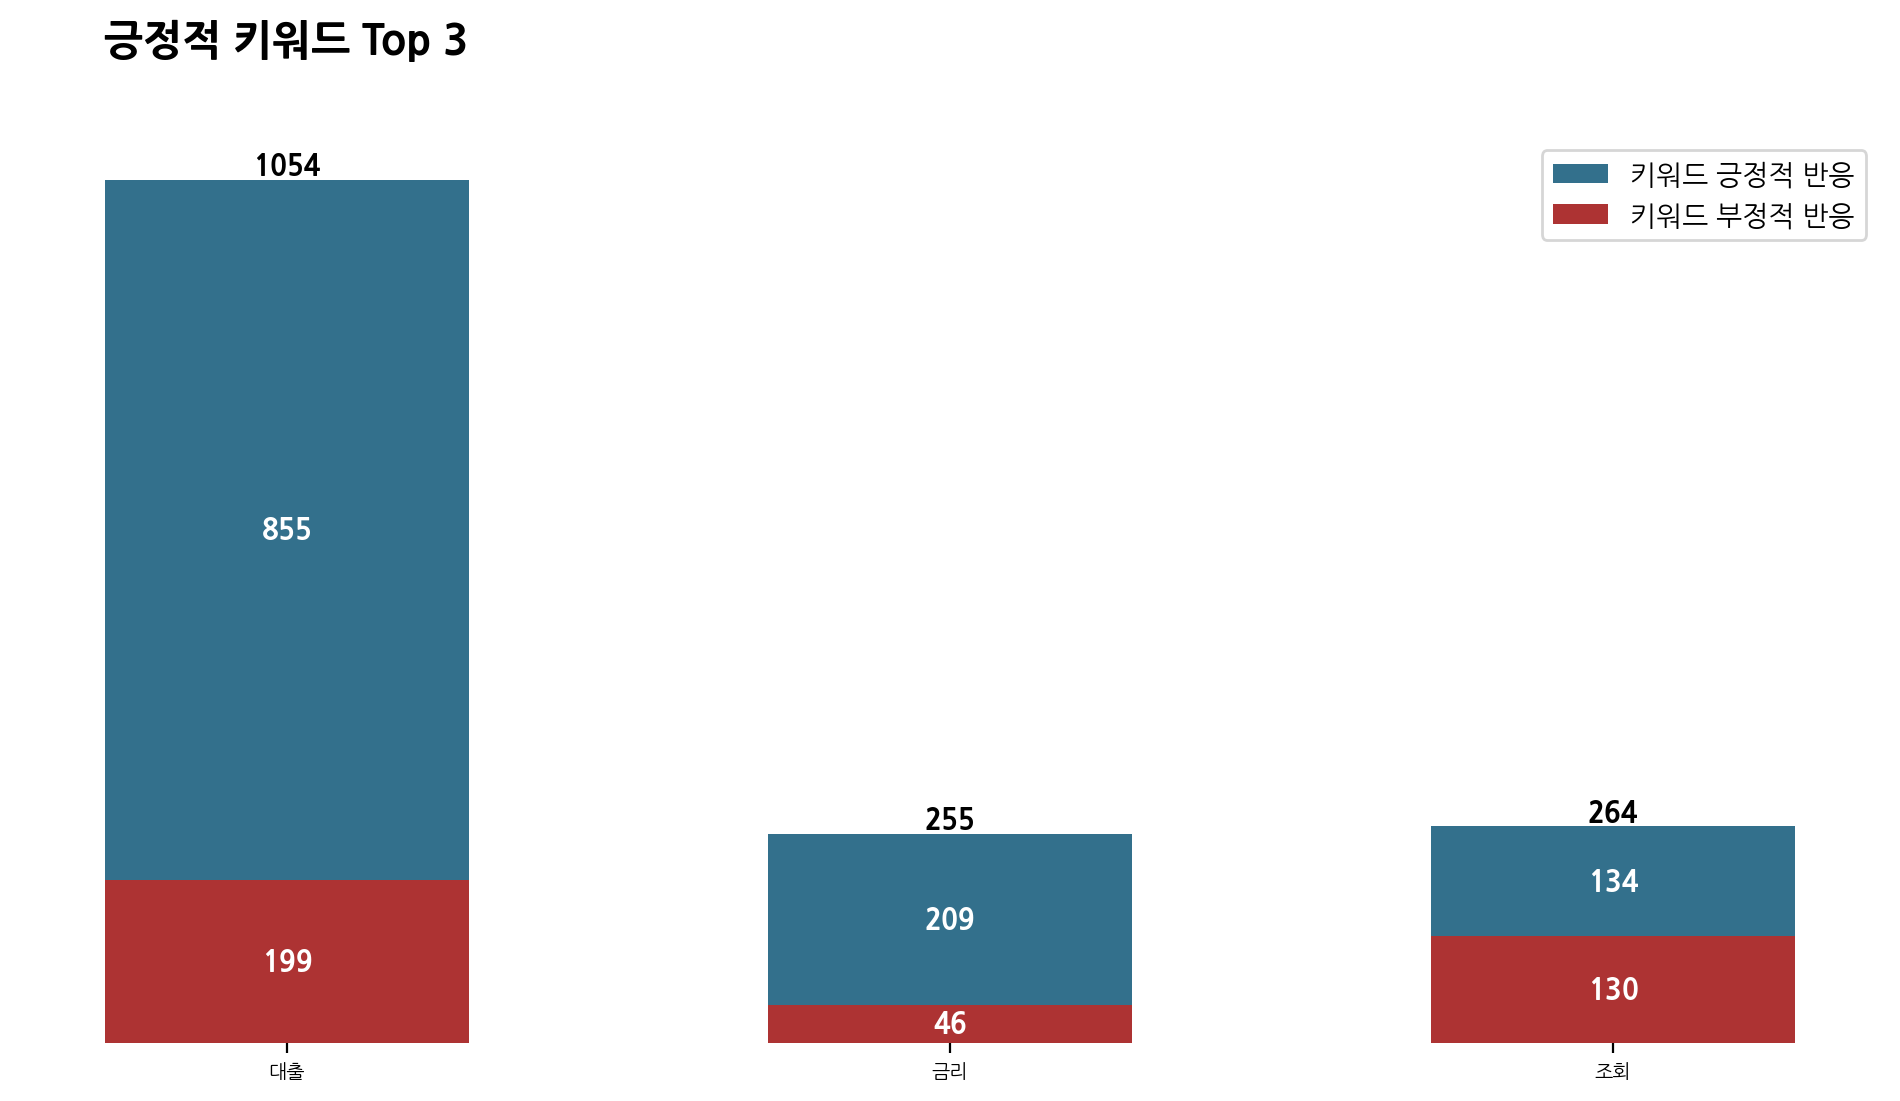

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))

k1 = ax.bar('대출', keyword_cnt_df['neg_loan'].sum(), width=0.55, color='#990000', alpha=0.8)
k2 = ax.bar('대출', keyword_cnt_df['pos_loan'].sum(), width=0.55, color='#004c70', alpha=0.8, bottom=keyword_cnt_df['neg_loan'].sum(), label='키워드 긍정적 반응')
k3 = ax.bar('금리', keyword_cnt_df['neg_interst'].sum(), width=0.55, color='#990000', alpha=0.8, label='키워드 부정적 반응')
k4 = ax.bar('금리', keyword_cnt_df['pos_interst'].sum(), width=0.55, color='#004c70', alpha=0.8, bottom=keyword_cnt_df['neg_interst'].sum())
k5 = ax.bar('조회', keyword_cnt_df['neg_serch'].sum(), width=0.55, color='#990000', alpha=0.8)
k6 = ax.bar('조회', keyword_cnt_df['pos_serch'].sum(), width=0.55, color='#004c70', alpha=0.8, bottom=keyword_cnt_df['neg_serch'].sum())

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_yticks([])
ax.legend()
fig.text(0.16, 0.95, '긍정적 키워드 Top 3', fontsize=15, fontweight='bold')   
ax.bar_label(k1, color = 'white', fontweight = 'bold', label_type='center')
ax.bar_label(k2, color = 'white', fontweight = 'bold', label_type='center')
ax.bar_label(k2, fontweight = 'bold')
ax.bar_label(k3, color = 'white', fontweight = 'bold', label_type='center')
ax.bar_label(k4, color = 'white', fontweight = 'bold', label_type='center')
ax.bar_label(k4, fontweight = 'bold')
ax.bar_label(k5, color = 'white', fontweight = 'bold', label_type='center')
ax.bar_label(k6, color = 'white', fontweight = 'bold', label_type='center')
ax.bar_label(k6, fontweight = 'bold')
plt.rcParams['xtick.labelsize'] = 6
plt.show()

### ppt3-2 Top2 negative keyword 시각화

In [16]:
call_cnt_df = keyword_visual_pre(pos_review_df, neg_review_df, '전화')
ad_cnt_df = keyword_visual_pre(pos_review_df, neg_review_df, '광고')

Text(0.5, 0.98, '      부정적 키워드 Top 2')

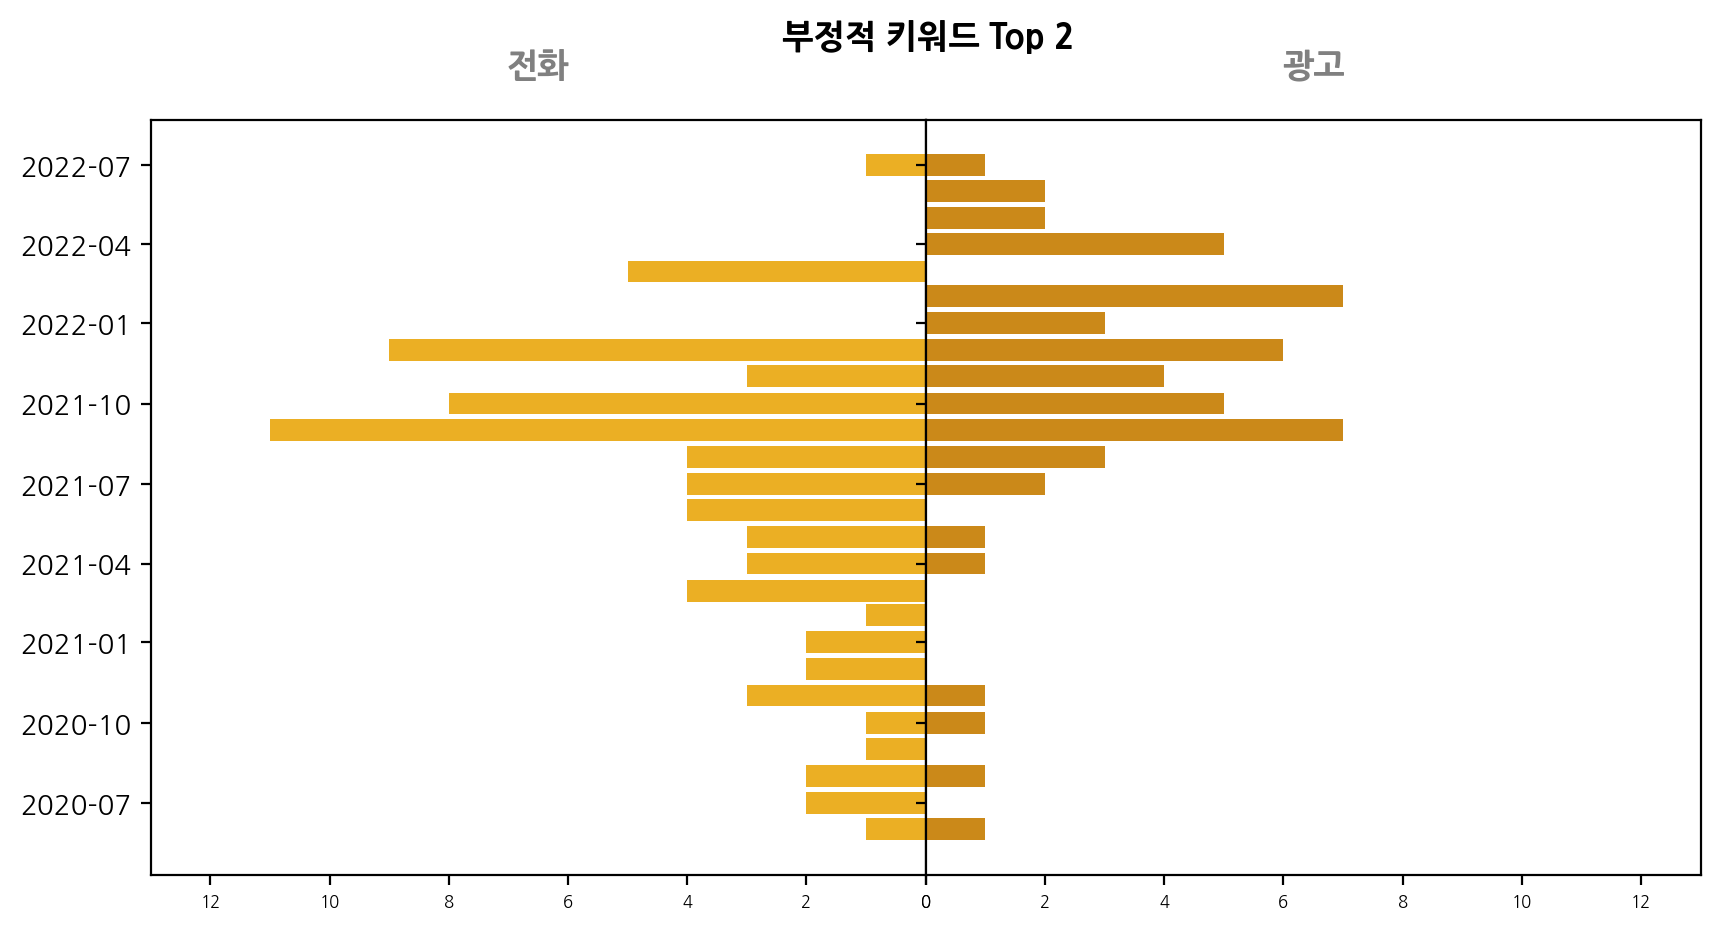

In [63]:
fig, axs = plt.subplots(ncols=2, sharey=True, 
                        figsize=(10, 5), gridspec_kw={"wspace":0})

axs[0].barh(call_cnt_df.index, call_cnt_df['neg_cnt'], height = 25, color='#e9a60c', alpha=0.9, label='전화')
axs[1].barh(ad_cnt_df.index, ad_cnt_df['neg_cnt'], height = 25, color='#c67c00', alpha=0.9, label='광고')

xmax = 13
axs[0].set_xlim(xmax, 0)
axs[1].set_xlim(0, xmax)

axs[0].set_title('전화', color="gray", fontweight="bold", pad=16)
axs[1].set_title('광고', color="gray", fontweight="bold", pad=16)

fig.suptitle(f"      부정적 키워드 Top 2", fontweight="bold")
